In [0]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot


In [0]:
def computeCost(X, Y, theta, lmda):
    m = Y.size  
    J = 0
    h=np.dot(X,theta)
    J=(1/(2*m))*(sum((h-Y)**2))
    k=((lmda/(2*m))*sum((theta)**2))
    J=J+k
    return J

In [0]:
def gradientDescent(x, y, theta, alpha, num_iters,lumda):
    m = y.size
    J_history = []
    alphabym=alpha/m
    for i in range(num_iters):
        H=np.dot(x,theta)
        theta = ( theta * (1-((alpha*lumda)/m)) ) - ( (alpha/m)* np.dot(x.T,H-y) )
        # save the cost J in every iteration
        J_history.append(computeCost(x,y,theta,lumda))
    return theta, J_history


In [0]:
def hyp(x, y, theta, alpha1,alpha2,alpha3, iterations,lumda):
    theta1, J_history1 = gradientDescent(x ,y, theta, alpha1, iterations,lumda)
    
    U=x**2
    theta2, J_history2 = gradientDescent(U ,y, theta, alpha2, iterations,lumda)
    

    w=(x)**3
    theta3, J_history3 = gradientDescent(w ,y, theta, alpha3, iterations,lumda)
     

    return  theta1, J_history1 , theta2, J_history2 ,theta3, J_history3




In [0]:
def lumda(s,l):
    m=s
    alphas=np.zeros(l)
    l=(alphas.size )
    for i in range(l):
        alphas[i]=(m/10)
        m=m/10
    return lumda

In [0]:
def computeCost2(X, Y, theta):
    m = Y.size  
    J = 0
    h=np.dot(X,theta)
    J=(1/(2*m))*(sum((h-Y)**2))
    return J

In [0]:
# def minn(h):
#     min1=h[0]
#     alpha=0
#     for i in range(h.size):
#         if h[i]<min1:
#            min1=h[i]
#            alpha=i
#     return alpha

In [0]:
def cross(alpha1,alpha2,alpha3,x,y,theta,x2,y2,iterations,lumda): 
    h1=np.zeros(lumda.size)
    h2=np.zeros(lumda.size)
    h3=np.zeros(lumda.size)
    for i in range(lumda.size):
        lumdas=lumda[i]
        t1,j1,t2,j2,t3,j3=hyp(x, y, theta, alpha1,alpha2,alpha3, iterations,lumdas)

        h1[i]=computeCost2(x2,y2,t1)
        h2[i]=computeCost2(x2,y2,t2)
        h3[i]=computeCost2(x2,y2,t3)
        alpha1=np.argmin(h1) 
        alpha2=np.argmin(h2) 
        alpha3=np.argmin(h3) 
    return alpha1,alpha2,alpha3,h1,h2,h3


[156710710117.4324, 126776487747.85332, 105966959896.71799, 90069296400.2914, 77475658343.56459, 67365516708.53554, 59206288631.21789, 52604976017.03283, 47255802805.38506, 42916012092.62016, 39391323091.79792, 36525669174.32026, 34193410989.318897, 32293251775.91249, 30743423818.550636, 29477857407.551735, 28443120642.991287, 27595968628.623272, 26901376699.446518, 26330959438.741795, 25861698023.766605, 25474914550.474743, 25155444570.596436, 24890968958.524452, 24671474026.443184, 24488814987.915653, 24336362785.634926, 24208718219.16749, 24101480442.629444, 24011059413.297863, 23934523887.629475, 23869478181.329525, 23813962214.181427, 23766370411.13221, 23725385878.59278, 23689926958.944874, 23659103818.701637, 23632183172.240955, 23608559603.99529, 23587732243.961212, 23569285787.632553, 23552875042.68461, 23538212339.55765, 23525057268.458874, 23513208306.866825, 23502495983.905228, 23492777294.632442, 23483931131.3417, 23475854542.78427, 23468459667.75439, 23461671218.28719, 23

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


[2.13731111e+010 9.23606635e+245             inf]


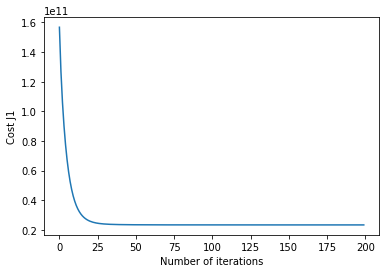

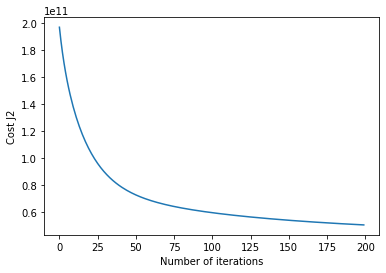

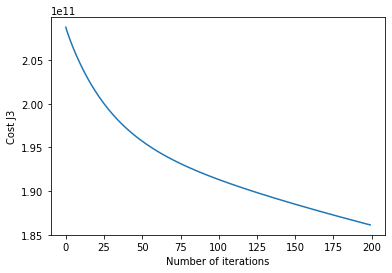

In [160]:
data=pd.read_csv('/content/house_data_complete (1).csv')
data=data.drop(['id','date','zipcode','lat','long'],1)
data=round(data)
data=data.dropna()
data_x = data.copy()
Y=data['price']
sizeofrows=data_x.shape[0]
training=data_x[:(round(sizeofrows*0.6))]
Y1=training['price']
training=training.drop(['price'],1)
training =(training - training.mean())/training.std()
training= np.concatenate([np.ones((training.shape[0],1)), training], axis=1)
theta=np.zeros(training.shape[1])

###############
crossvalidationlength=round(sizeofrows*0.6+1+sizeofrows*0.2)
crossvalidation=data_x[(round(sizeofrows*0.6)+1):crossvalidationlength]
Y2=crossvalidation['price']
crossvalidation=crossvalidation.drop(['price'],1)
crossvalidation =(crossvalidation - crossvalidation.mean())/crossvalidation.std()
crossvalidation= np.concatenate([np.ones((crossvalidation.shape[0],1)), crossvalidation], axis=1)
#### to know which alpha to use
iterations=200
lumda=0
theta1, J_history1 = gradientDescent(training ,Y1, theta, 0.1, iterations,lumda)
print(J_history1)
U=training**2
theta2, J_history2 = gradientDescent(U ,Y1, theta, 0.001, iterations,lumda)
print(J_history2)

w=(training)**3
theta3, J_history3 = gradientDescent(w ,Y1, theta, 0.000001, iterations,lumda)
print(J_history3)
pyplot.figure()
pyplot.plot(np.arange(len(J_history1)), J_history1)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J1')

pyplot.figure()
pyplot.plot(np.arange(len(J_history2)), J_history2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J2')

pyplot.figure()
pyplot.plot(np.arange(len(J_history3)), J_history3)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J3')
##############################
lumda=np.array([0,0.01,0.02])    
alpha1=0.1
alpha2=0.001
alpha3=0.000001
# a1,a2,a3,h1,h2,h3= cross(alpha1,alpha2,alpha3,training,Y1,theta,crossvalidation,Y2,iterations,lumda)
# print(a1)
# print(a2)
# print(a3)
# print(h1)
# print(h2)
# print(h3)


h1=np.zeros(lumda.size)
h2=np.zeros(lumda.size)
h3=np.zeros(lumda.size)
for i in range(lumda.size):
    lumdas=lumda[i]
    t1=0
    j1=0
    t1,j1,t2,j2,t3,j3=hyp(x, y, theta, alpha1,alpha2,alpha3, iterations,lumdas)
    h1[i]=computeCost2(crossvalidation,Y2,t1)
    h2[i]=computeCost2(crossvalidation,Y2,t2)
    h3[i]=computeCost2(crossvalidation,Y2,t3)
    alpha1=np.argmin(h1) 
    alpha2=np.argmin(h2) 
    alpha3=np.argmin(h3) 
print(h1)
# complete.sample(frac=1, replace=False)

# theta1, J_history1 , theta2, J_history2 ,theta3, J_history3= hyp(training, Y1, theta, alpha[a1],alpha[a2],alpha[a3], iterations,lumda)
# pyplot.figure()
# pyplot.plot(np.arange(len(J_history1)), J_history1)
# pyplot.xlabel('Number of iterations')
# pyplot.ylabel('Cost J1')

# pyplot.figure()
# pyplot.plot(np.arange(len(J_history2)), J_history2)
# pyplot.xlabel('Number of iterations')
# pyplot.ylabel('Cost J2')

# pyplot.figure()
# pyplot.plot(np.arange(len(J_history3)), J_history3)
# pyplot.xlabel('Number of iterations')
# pyplot.ylabel('Cost J3')